Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
                                                    Date  \
State                                                      
NSW    1-Oct-20201-Oct-20201-Oct-20201-Oct-20201-Oct-...   
NT     1-Oct-20201-Oct-20201-Oct-20201-Oct-20201-Oct-...   
QLD    1-Oct-20201-Oct-20201-Oct-20201-Oct-20201-Oct-...   
SA     1-Oct-20201-Oct-20201-Oct-20201-Oct-20201-Oct-...   
TAS    1-Oct-20201-Oct-20201-Oct-20201-Oct-20201-Oct-...   
VIC    1-Oct-20201-Oct-20201-Oct-20201-Oct-20201-Oct-...   
WA     1-Oct-20201-Oct-20201-Oct-20201-Oct-20201-Oct-...   

                                                    Time  \
State                                                      
NSW     Morning Morning Morning Morning Afternoon Aft...   
NT      Morning Morning Morning Morning Afternoon Aft...   
QLD     Morning Morning Morning Morning Afternoon Aft...   
SA      Morning Morning Morning Morning Afternoon Aft...   
TAS     Morning Morn

C:\Users\gursa\AppData\Local\Temp\ipykernel_8076\1280120338.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


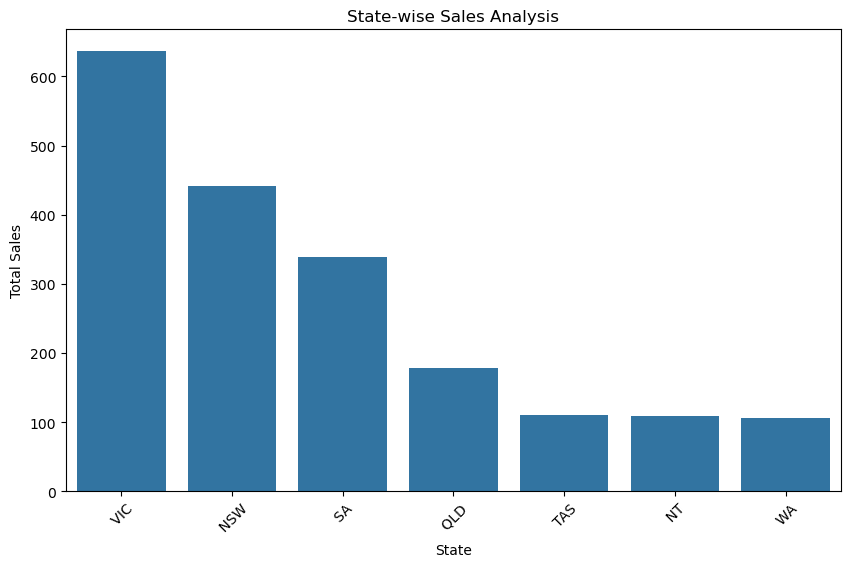

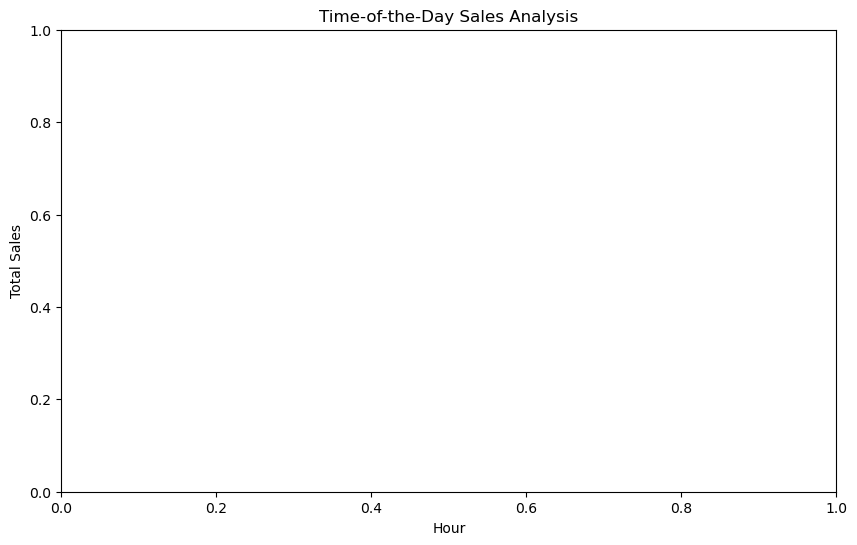

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
                                                    Date  \
State                                                      
NSW    1-Oct-20201-Oct-20201-Oct-20201-Oct-20201-Oct-...   
NT     1-Oct-20201-Oct-20201-Oct-20201-Oct-20201-Oct-...   
QLD    1-Oct-20201-Oct-20201-Oct-20201-Oct-20201-Oct-...   
SA     1-Oct-20201-Oct-20201-Oct-20201-Oct-20201-Oct-...   
TAS    1-Oct-20201-Oct-20201-Oct-20201-Oct-20201-Oct-...   
VIC    1-Oct-20201-Oct-20201-Oct-20201-Oct-20201-Oct-...   
WA     1-Oct-20201-Oct-20201-Oct-20201-Oct-20201-Oct-...   

                                                    Time  \
State                                                      
NSW     Morning Morning Morning Morning Afternoon Aft...   
NT      Morning Morning Morning Morning Afternoon Aft...   
QLD     Morning Morning Morning Morning Afternoon Aft...   
SA      Morning Morning Morning Morning Afternoon Aft...   
TAS     Morning Morn

C:\Users\gursa\AppData\Local\Temp\ipykernel_8076\1280120338.py:113: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


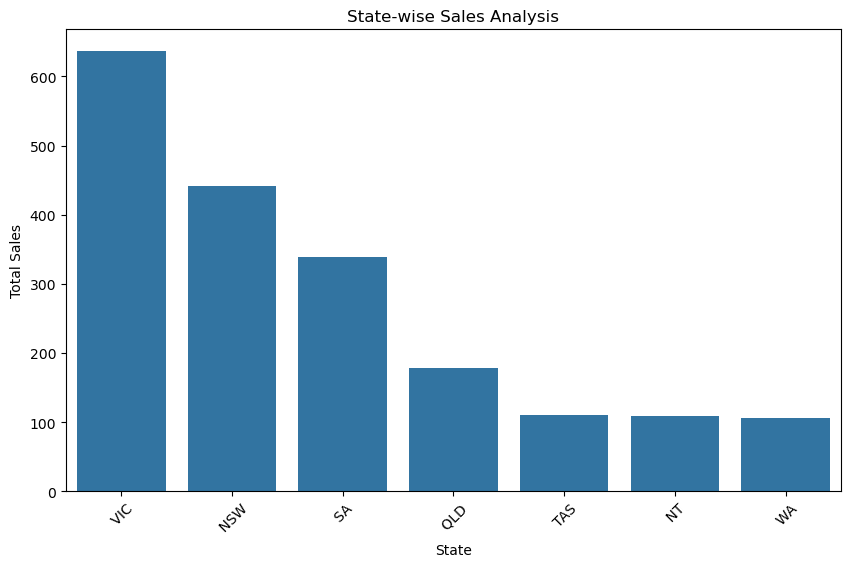

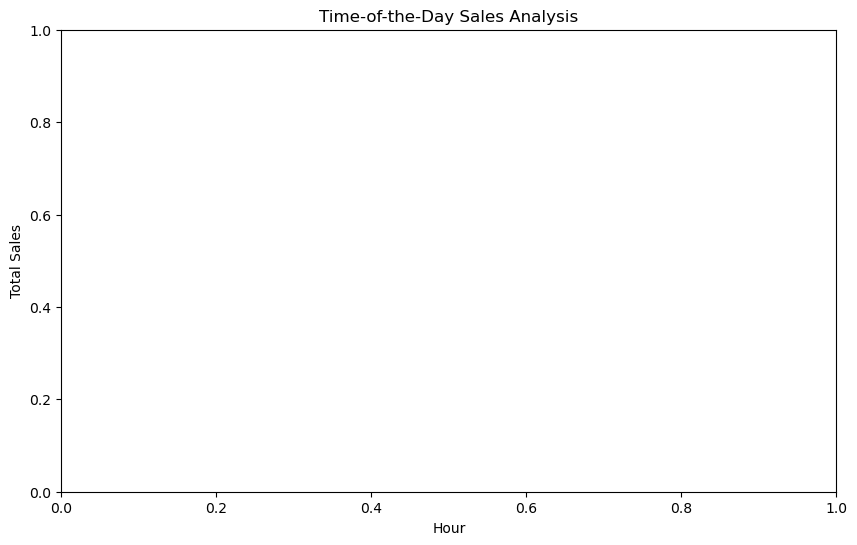

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

# Inspect for missing values
print(df.isna().sum())

# Handling missing values - recommendation:
df = df.dropna()  # or df.fillna(method='ffill')

# Normalize the data
if 'Sales' in df.columns:
    scaler = MinMaxScaler()
    df[['Sales']] = scaler.fit_transform(df[['Sales']])
else:
    print("Sales column not found in the data.")

# GroupBy function for data chunking
if 'State' in df.columns:
    state_group = df.groupby('State').sum()
    print(state_group)
else:
    print("State column not found in the data.")

# Convert 'Time' column to recognizable time format
def parse_time(time_str):
    if time_str.lower() == 'morning':
        return '09:00'
    elif time_str.lower() == 'afternoon':
        return '15:00'
    elif time_str.lower() == 'evening':
        return '18:00'
    else:
        return time_str

df['Time'] = df['Time'].apply(parse_time)

# Convert 'Time' column to datetime
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

# Check for conversion errors
if df['Hour'].isna().sum() > 0:
    print("Some rows could not be parsed. Showing the first few examples:")
    print(df[df['Hour'].isna()].head())

# Plotting state-wise sales
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=state_sales.index, y=state_sales.values)
plt.title('State-wise Sales Analysis')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Plotting time-of-the-day sales
hourly_sales = df.groupby('Hour')['Sales'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values)
plt.title('Time-of-the-Day Sales Analysis')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.show()



import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

# Inspect for missing values
print(df.isna().sum())

# Handling missing values - recommendation:
df = df.dropna()  # or df.fillna(method='ffill')

# Normalize the data
if 'Sales' in df.columns:
    scaler = MinMaxScaler()
    df[['Sales']] = scaler.fit_transform(df[['Sales']])
else:
    print("Sales column not found in the data.")

# GroupBy function for data chunking
if 'State' in df.columns:
    state_group = df.groupby('State').sum()
    print(state_group)
else:
    print("State column not found in the data.")

# Convert 'Time' column to recognizable time format
def parse_time(time_str):
    if time_str.lower() == 'morning':
        return '09:00'
    elif time_str.lower() == 'afternoon':
        return '15:00'
    elif time_str.lower() == 'evening':
        return '18:00'
    else:
        return time_str

df['Time'] = df['Time'].apply(parse_time)

# Convert 'Time' column to datetime
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

# Check for conversion errors
if df['Hour'].isna().sum() > 0:
    print("Some rows could not be parsed. Showing the first few examples:")
    print(df[df['Hour'].isna()].head())

# Plotting state-wise sales
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=state_sales.index, y=state_sales.values)
plt.title('State-wise Sales Analysis')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Plotting time-of-the-day sales
hourly_sales = df.groupby('Hour')['Sales'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values)
plt.title('Time-of-the-Day Sales Analysis')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.show()
